In [53]:
import pandas as pd
import numpy as np
import pickle

In [54]:
#path = "../Data/Barcelona/05Stage/Tables/Cut/Score/Individual/2_0_cutIndividualMetrics.pkl"
path = "../Data/Barcelona/05Stage/Tables/Cut/Player/5216_cutIndividualMetrics.pkl"


In [55]:
def load_metrics(file):
    try:
        with open(file, "rb") as f:
            deserializedFile = pickle.load(f)
        return deserializedFile
    except FileNotFoundError:
        print(f"File  not found.")


In [56]:
data = {
    'A': [1, 2, None, 4],
    'B': [5, None, 7, 8],
    'C': [9, 10, 11, None]
}
df = pd.DataFrame(data)

# Drop NaN values from rows
df_without_nan = df.dropna(axis=0)

print(df_without_nan)

     A    B    C
0  1.0  5.0  9.0


In [57]:
def load_scores(scores):
    try:
        # Open the CSV file
        # Create a CSV reader object
        dfScore = pd.read_csv(scores)
        return dfScore
    except FileNotFoundError:
        print("The file does not exist.")
    except Exception as e:
        print("An error occurred:", e)

In [58]:
file = load_metrics(path)

In [59]:
#print(file.columns)

In [60]:
#headers = set(header[0] for header in file.columns)
#headers

In [61]:
file

inD                         outD                        clust        \
     Mean   Std Count      Class  Mean   Std Count      Class  Mean   Std   
0_1  0.56  0.37     4     medium  0.44  0.31     4     medium  0.67  0.17   
0_2  0.56  0.00     1     medium  1.00  0.00     1  excellent  0.60  0.00   
1_2  0.79  0.08     2       good  0.90  0.10     2  excellent  0.85  0.09   
1_0  0.60  0.29    19     medium  0.53  0.32    19     medium  0.53  0.27   
2_0  0.73  0.23    12       good  0.76  0.21    12       good  0.57  0.21   
3_0  0.72  0.24    10       good  0.68  0.31    10       good  0.56  0.23   
4_0  0.57  0.28     7     medium  0.50  0.22     7     medium  0.55  0.22   
5_0  0.50  0.37     4     medium  0.69  0.34     4       good  0.53  0.35   
6_0  0.43  0.14     2     medium  0.92  0.08     2  excellent  0.49  0.12   
7_0  0.00  0.00     0      worst  0.00  0.00     0      worst  0.00  0.00   
8_0  0.00  0.00     0      worst  0.00  0.00     0      worst  0.00  0.00   
1_1  0.54  0.30     8     medium  0.61  0.31     8       good  0.53  0.22   
2_1  0.69  0.31     6       good  0.78  0.23     6       good  0.61  0.19   
2_2  0.67  0.00     1       good  0.40  0.00     1        bad  0.60  0.00   
3_1  0.31  0.19     2        bad  0.25  0.25     2        bad  0.39  0.39   
4_1  0.44  0.00     1     medium  0.38  0.00     1        bad  0.37  0.00   
0_3  1.00  0.00     1  excellent  1.00  0.00     1  excellent  0.47  0.00   
1_3  0.86  0.00     1  excellent  1.00  0.00     1  excellent  0.11  0.00   
1_4  1.00  0.00     1  excellent  1.00  0.00     1  excellent  0.00  0.00   
5_1  1.00  0.00     1  excellent  1.00  0.00     1  excellent  0.77  0.00   
5_2  0.00  0.00     0      worst  0.00  0.00     0      worst  0.00  0.00   
6_1  0.00  0.00     0      worst  0.00  0.00     0      worst  0.00  0.00   

     ...  clos            eigenv                         ecce              \
     ... Count      Class   Mean   Std Count      Class  Mean   Std Count   
0_1  ...     4       good   0.56  0.33     4     medium  0.50  0.35     4   
0_2  ...     1       good   0.00  0.00     0      worst  0.00  0.00     0   
1_2  ...     2  excellent   0.74  0.08     2       good  0.25  0.25     2   
1_0  ...    19       good   0.77  0.15    17       good  0.44  0.39    16   
2_0  ...    12       good   0.76  0.14    11       good  0.14  0.22    11   
3_0  ...    10       good   0.79  0.12     9       good  0.22  0.34     9   
4_0  ...     7       good   0.70  0.25     5       good  0.50  0.45     5   
5_0  ...     4     medium   0.66  0.26     3       good  0.33  0.47     3   
6_0  ...     2       good   0.68  0.15     2       good  0.00  0.00     2   
7_0  ...     0      worst   0.00  0.00     0      worst  0.00  0.00     0   
8_0  ...     0      worst   0.00  0.00     0      worst  0.00  0.00     0   
1_1  ...     8       good   0.64  0.30     6       good  0.17  0.37     6   
2_1  ...     6       good   0.70  0.13     6       good  0.14  0.20     6   
2_2  ...     1       good   0.00  0.00     0      worst  0.00  0.00     0   
3_1  ...     2        bad   0.36  0.00     1        bad  0.00  0.00     1   
4_1  ...     1       good   0.69  0.00     1       good  1.00  0.00     1   
0_3  ...     1  excellent   1.00  0.00     1  excellent  0.00  0.00     1   
1_3  ...     1  excellent   0.84  0.00     1  excellent  0.00  0.00     1   
1_4  ...     1       good   0.62  0.00     1       good  0.62  0.00     1   
5_1  ...     1  excellent   1.00  0.00     1  excellent  0.00  0.00     1   
5_2  ...     0      worst   0.00  0.00     0      worst  0.00  0.00     0   
6_1  ...     0      worst   0.00  0.00     0      worst  0.00  0.00     0   

                
         Class  
0_1     medium  
0_2      worst  
1_2        bad  
1_0     medium  
2_0      worst  
3_0        bad  
4_0     medium  
5_0        bad  
6_0      worst  
7_0      worst  
8_0      worst  
1_1      worst  
2_1      worst  
2_2      worst  
3_1      worst  
4_1  excellent  
0_

In [62]:
headers = set(header[0] for header in file.columns)
    
for header in headers:
    classifyValues = pd.cut(
        np.array(file[(f"{header}", "Mean")]),
        5,
        labels=["wortst","bad", "medium", "good", "excellent"],
        duplicates='drop'  # Set duplicates to 'drop'
    ).astype(str)
    columnClassifiy = pd.DataFrame({'Class': classifyValues}, index=file[(f"{header}", "Mean")].index)
    print(columnClassifiy)

         Class
0_1     medium
0_2  excellent
1_2  excellent
1_0     medium
2_0       good
3_0       good
4_0     medium
5_0       good
6_0  excellent
7_0     wortst
8_0     wortst
1_1       good
2_1       good
2_2        bad
3_1        bad
4_1        bad
0_3  excellent
1_3  excellent
1_4  excellent
5_1  excellent
5_2     wortst
6_1     wortst
         Class
0_1     medium
0_2     wortst
1_2     medium
1_0        bad
2_0     medium
3_0     medium
4_0       good
5_0       good
6_0  excellent
7_0     wortst
8_0     wortst
1_1     medium
2_1     medium
2_2     wortst
3_1       good
4_1     wortst
0_3  excellent
1_3  excellent
1_4  excellent
5_1     medium
5_2     wortst
6_1     wortst
         Class
0_1     medium
0_2     medium
1_2       good
1_0     medium
2_0       good
3_0       good
4_0     medium
5_0     medium
6_0     medium
7_0     wortst
8_0     wortst
1_1     medium
2_1       good
2_2       good
3_1        bad
4_1     medium
0_3  excellent
1_3  excellent
1_4  excellent
5_1  excel

In [63]:
max_value = file[('inD', 'Count')].max()
print(max_value)
# Step 2: Calculate the threshold (1/4 of the maximum value)
threshold = max_value / 4
print(threshold)
# Step 3: Filter the DataFrame
filtered_df = file[file[('inD', 'Count')] >= threshold]

print("\nFiltered DataFrame:\n", filtered_df)

19
4.75

Filtered DataFrame:
       inD                      outD                     clust        ...  \
     Mean   Std Count   Class  Mean   Std Count   Class  Mean   Std  ...   
1_0  0.60  0.29    19  medium  0.53  0.32    19  medium  0.53  0.27  ...   
2_0  0.73  0.23    12    good  0.76  0.21    12    good  0.57  0.21  ...   
3_0  0.72  0.24    10    good  0.68  0.31    10    good  0.56  0.23  ...   
4_0  0.57  0.28     7  medium  0.50  0.22     7  medium  0.55  0.22  ...   
1_1  0.54  0.30     8  medium  0.61  0.31     8    good  0.53  0.22  ...   
2_1  0.69  0.31     6    good  0.78  0.23     6    good  0.61  0.19  ...   

     clos       eigenv                    ecce                      
    Count Class   Mean   Std Count Class  Mean   Std Count   Class  
1_0    19  good   0.77  0.15    17  good  0.44  0.39    16  medium  
2_0    12  good   0.76  0.14    11  good  0.14  0.22    11   worst  
3_0    10  good   0.79  0.12     9  good  0.22  0.34     9     bad  
4_0     7  good 

In [64]:
a = pd.cut(np.array(file[("inD", "Mean")]), 5,
       labels=["worst", "bad", "medium", "good", "excellent"])

b = pd.cut(np.array(file[("outD", "Mean")]), 5, labels=["worst", "bad", "medium", "good", "excellent"])

In [65]:
print(a)
print("")
print(b)

['medium', 'medium', 'good', 'medium', 'good', ..., 'excellent', 'excellent', 'excellent', 'worst', 'worst']
Length: 22
Categories (5, object): ['worst' < 'bad' < 'medium' < 'good' < 'excellent']

['medium', 'excellent', 'excellent', 'medium', 'good', ..., 'excellent', 'excellent', 'excellent', 'worst', 'worst']
Length: 22
Categories (5, object): ['worst' < 'bad' < 'medium' < 'good' < 'excellent']


GRÀFICS

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
categories = ['excellent', 'good', 'medium', 'bad', 'worst']
cat_type = pd.CategoricalDtype(categories=categories, ordered=True)
file[('inD', 'Class')] = file[('inD', 'Class')].astype(cat_type)

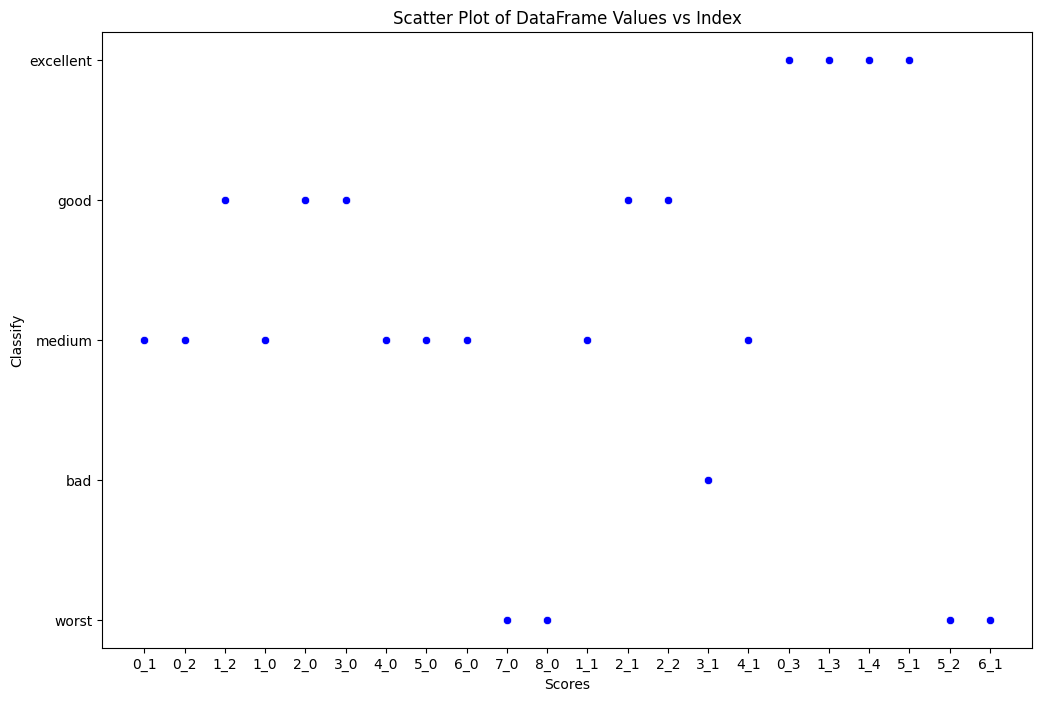

In [68]:
plt.figure(figsize=(12,8 ))
sns.scatterplot(x=file.index, y=file[("inD","Class")], color='blue')

# Adding titles and labels
plt.title('Scatter Plot of DataFrame Values vs Index')
plt.xlabel('Scores')
plt.ylabel('Classify')

# Displaying the plot
plt.grid(False)
plt.show()